<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">


# <center> **10. Machine Learning: More methods** </center>



## **Outline**
1. [**Decision Trees (DT)**](#eje1)
2. [**Random Forest (RF)**](#eje2)
3. [**Support vector Machine (SVM)**](#eje3)
4. [**Classification Boundaries**](#topic4)
5. [**Overfitting and underfitting**](#topic5)




In [ ]:
import os
from google.colab import drive

path_ai = "Academia40/Notebooks"
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Academia40/Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.2.2'

**Load a dataset to explore other ML alternatives in classification**

- To get a classifier using a particular partition (train=80, test=20)

In [ ]:
#@title **code** Train-test split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

## Cargar dataset de billetes falsos y verdaderos
d = pd.read_csv("data/Copy of data_banknote_authentication.txt.gz")
print(d.shape)

## CVamos a separar las características de las etiquetas.
X = d.values[:,:-1]
y = d.values[:,-1]

## Vmoas a separar el dataset en train y test con la función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Cargar modelo GNB
est = GaussianNB()

## entrenamos el modelo
est.fit(X_train,y_train)

## Imprimimos resultados
print(accuracy_score(est.predict(X_test), y_test))

(1372, 5)
0.8109090909090909


In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

# **1. Decision Tree classifier**  <a name="eje1"></a>

The idea is to create a model that predicts the value of a target variable based on several input variables. The observations about an item is represented in the branches and the conclusions about the item's target value represented in the leaves


- Tree models where the target variable can take a discrete set of values are called **classification trees**
- Decision trees where the target variable can take continuous values (typically real numbers) are called **regression trees**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/CART_tree_titanic_survivors.png" width="700">


- During **training** a set of thresholds are learned from several optimization algorithm (entropy, gini_inpurity). The number of thresholds define the levels of each decision tree.

- DT can understood as `if-then` structures that split recursively a feature
- Classification trees are a greedy algorithm which means by default it will continue to split until it has a pure node.

- The DT may be sensible because their random initialization and construction of trees. With `random_state=0` you obtain a pseudo-random experiment.
- Observe the natural implementation from `sklearn`


In [ ]:
#@title **code:** working with decision trees
## importamos el modelo..
from sklearn.tree import DecisionTreeClassifier

## Definir el modelo
est = DecisionTreeClassifier(max_depth=3)

## entrenamos el modelo
est.fit(X_train,y_train)

## Imprimimos las métricas
print(accuracy_score(est.predict(X_test), y_test))

0.9418181818181818


In [ ]:
#@title **code: working with decision trees and cross validation**
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

est = DecisionTreeClassifier(max_depth=4)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.951 (+/- 0.01761)
tpr      0.953 (+/- 0.03179)
tnr      0.950 (+/- 0.01991)


In [ ]:
d

,varwt,skewt,curwt,entrwt,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


**Many times is useful to know what features are more important to classify!**

In [ ]:
#@title **code**
# 1. entrenamos el modelo
est.fit(X_train,y_train)

# 2. atributo: feature_importances
print(est.feature_importances_)
print(np.sum(est.feature_importances_))

[0.66837512 0.21850452 0.10928589 0.00383448]
1.0


In [ ]:
np.shape(X)

(1372, 4)

In [ ]:
d.columns[:-1].values

array(['varwt', 'skewt', 'curwt', 'entrwt'], dtype=object)

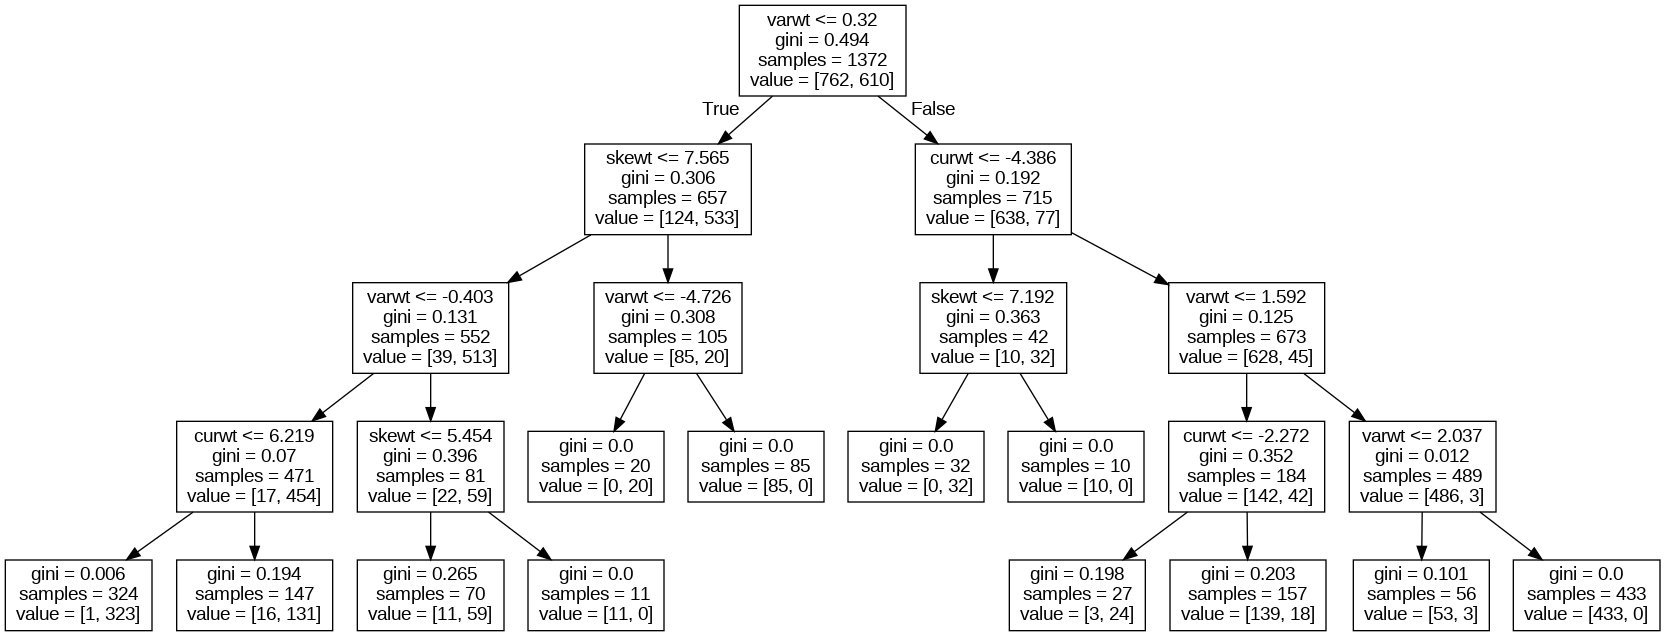

In [ ]:
#@title **code** Visualize the resultant tree
#!sudo apt-get install graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
est.fit(X, y)
export_graphviz(est, out_file='tree_c.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_c.dot > tree_c.png

Image(filename='tree_c.png')

# Challenge

- Perform a classification using the most detected important features. Which classifier is best?

- Drawn the restulant tree for the best configuration

- Change hyperparameters of DT to observe performance

(1372, 5)
0.9345454545454546


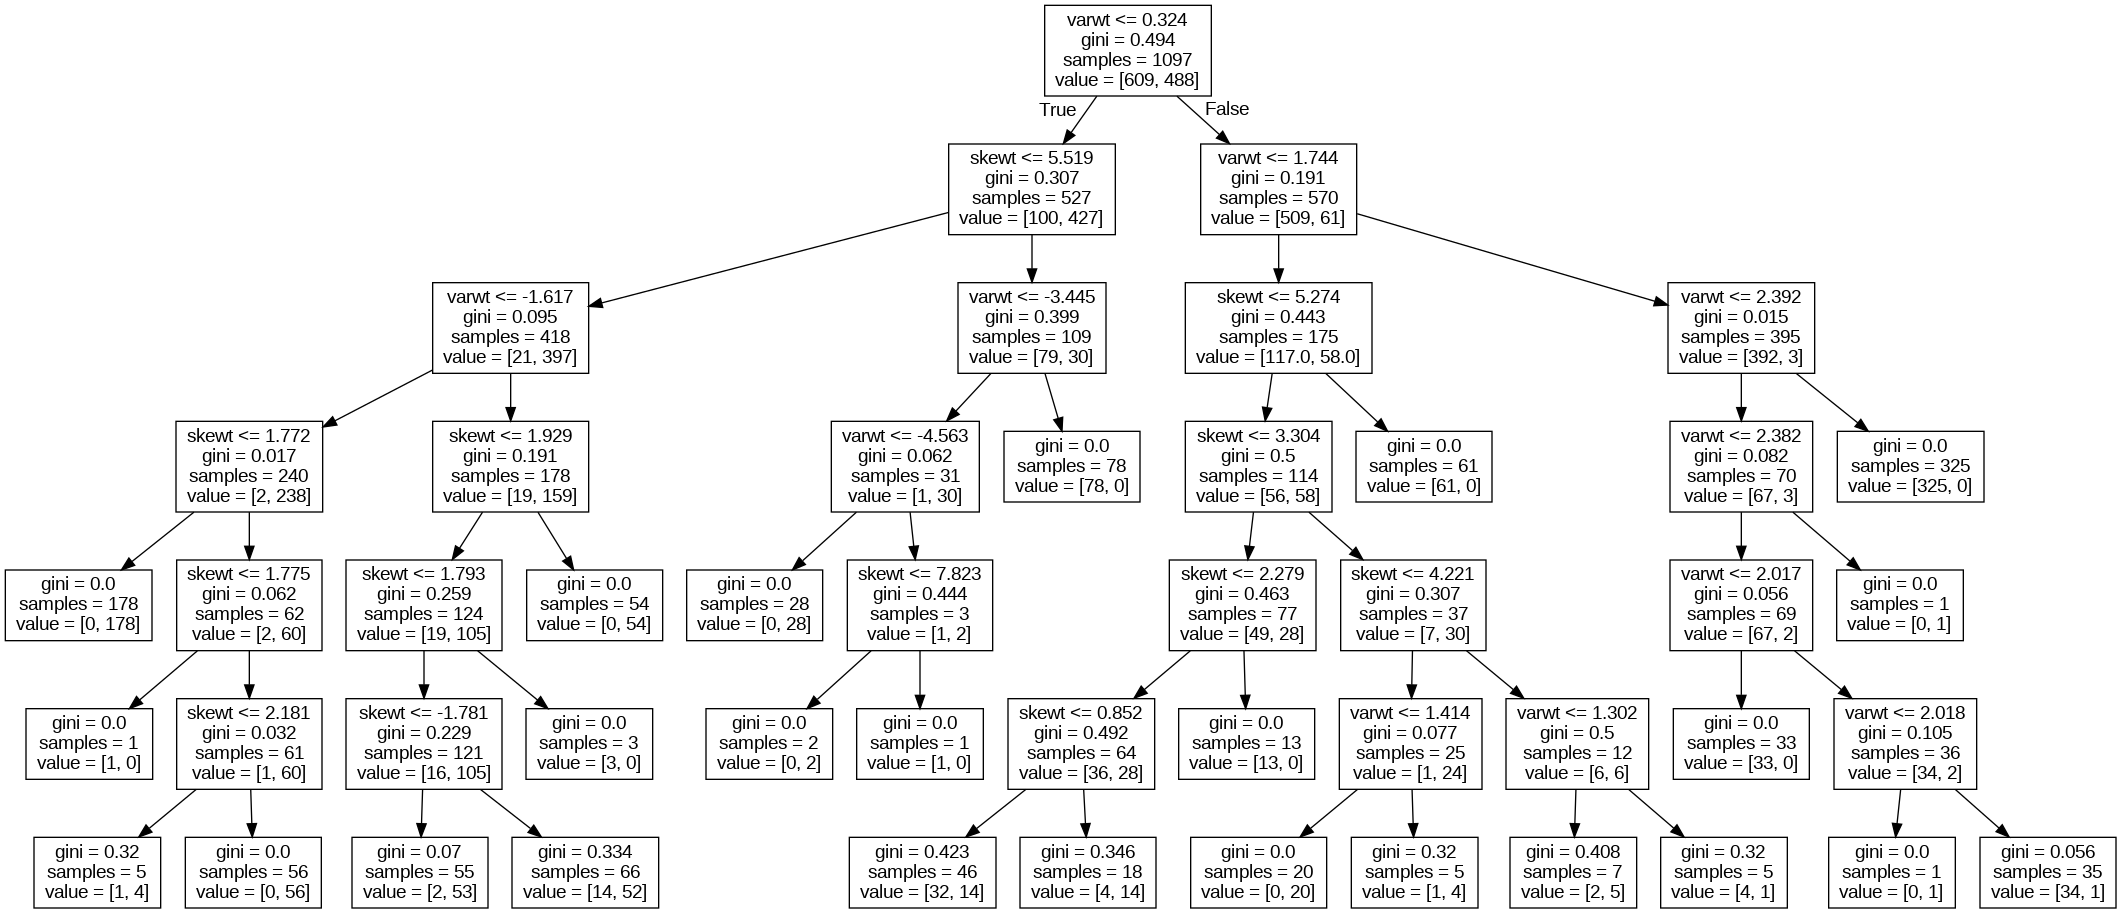

In [ ]:
#@title **Solution**

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Cargar dataset
d = pd.read_csv("data/Copy of data_banknote_authentication.txt.gz")
print(d.shape)

## Separar los datos de las etiquetas
X = d.values[:,:2]
y = d.values[:,-1]

## separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Cargar modelo definiendo la profundidad del arbol
est = DecisionTreeClassifier(max_depth=6)

## Entrenar el modelo
est.fit(X_train,y_train)

## Calcular el accuracy
print(accuracy_score(est.predict(X_test), y_test))

export_graphviz(est, out_file='tree_c.dot', feature_names=d.columns[:2].values)
!dot -Tpng tree_c.dot > tree_c.png

Image(filename='tree_c.png')




# **2. Random Forest classifier (RFC)** <a name="eje2"></a>

Many times the tree is dependent of features initialization and the output can be sensible. To overcome some of these problems, a set of trees can be built to perform the classification. Each tree give a result an agreement criteria is used to obtain the classification


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/randomforest.jpeg" width="500">


In [ ]:
#@title **code:** working with a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9454545454545454


In [ ]:
#@title **code** Implementing a Random forest classifier and a cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

est = RandomForestClassifier()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.934 (+/- 0.01845)
tpr      0.932 (+/- 0.03385)
tnr      0.942 (+/- 0.03048)


#**CHALLENGE**

- Compute precision and Recall for this training-test results

- Evalaute other configuration of RF, for instance, using other number of trees.

In [ ]:
#@title **code** classification report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## Cargando el modelo (sin conocimientos de nada)
est = RandomForestClassifier()

## Entrenando el modelo (Está aprendiendo  -> datas de entrenamiento)
est.fit(X_train,y_train)

## Generando predicciones con los datos de prueba (El modelo está presentando el parcial)
y_pred = est.predict(X_test)

##
print(classification_report(y_test, y_pred))





              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       235
         1.0       0.92      0.94      0.93       177

    accuracy                           0.94       412
   macro avg       0.94      0.94      0.94       412
weighted avg       0.94      0.94      0.94       412



# **3. Support vector machine (SVM)** <a name="eje3"></a>

This strategy is one of the most know machine learning thecnique. It is based on learn a model to separate two classes, which are represented as vectors.

- The examples are used to find best vectors **(support vectors)** that better split the learning space. This support vectors are closer to the hiperplane.

- The **main** goal is to **maximize** the classifier margin, described between the **support vectors**

- Example:
    - H1 **No** separa las clases
    - H2 perform a separation with little margin
    - H3 bult boundaries that separate both classes with maximum margin
- **Marginn**: maximum distance between the hiperplane and data

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/svm_diagram.png" width="1000">


In [ ]:
#@title **code** SVM classification
from sklearn.svm import SVC
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9199029126213593


In [ ]:
#@title **code** SVM classification and cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

est = SVC()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.929 (+/- 0.02438)
tpr      0.935 (+/- 0.03029)
tnr      0.922 (+/- 0.03190)


#**CHALLENGE**

- Compute precision and Recall for this training-test results

- Evalaute other configuration of RF, for instance, using other number of trees.

In [ ]:
#@title **Solution**

## separar los datops en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## Definir el modelo y el kernel
est = SVC(kernel='rbf')

est.fit(X_train,y_train)

y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67       235
         1.0       0.56      0.55      0.56       177

    accuracy                           0.62       412
   macro avg       0.62      0.62      0.62       412
weighted avg       0.62      0.62      0.62       412



# 4. **Classification Boundaries**

Regarding the machine learning classification, we design, model and build strategies to separate train examples. In other words, separate samples means to create boundaries. According to the assumptions of each strategy, each model build different boundaries.

Now, we can see how to separate examples. We are using a toy dataset, it is **generated everytime** by deafult.

- Take a moment to see `make_moons` dataset.

In [ ]:
#@title **code**
import os
def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, impurity=False, class_names=["blue", "red"],
                        feature_names=feature_names, label="none")

    os.system("dot -Tpng dt.dot -o dt.png")




def plot_2Ddata_with_boundary(predict,X,y, alpha=.5):
    if predict is not None:
      n = 200
      mins,maxs = np.min(X,axis=0), np.max(X,axis=0)
      mins -= np.abs(mins)*.2
      maxs += np.abs(maxs)*.2
      d0 = np.linspace(mins[0], maxs[0],n)
      d1 = np.linspace(mins[1], maxs[1],n)
      gd0,gd1 = np.meshgrid(d0,d1)
      D = np.hstack((gd0.reshape(-1,1), gd1.reshape(-1,1)))
      p = (predict(D)*1.).reshape((n,n))
      plt.contourf(gd0,gd1,p, levels=[-0.1,0.5], alpha=0.5, cmap=plt.cm.Greys)
    plt.scatter(X[y==0][:,0], X[y==0][:,1], c="blue", alpha=alpha)
    plt.scatter(X[y==1][:,0], X[y==1][:,1], c="red", alpha=alpha)

hasdot = os.system("dot")
if hasdot!=0:
    print ("Installing Graphviz for tree visualization")
    os.system("sudo apt-get update")
    os.system("sudo apt-get install -y graphviz")
else:
    print( "Graphviz already installed")


from sklearn import datasets
from sklearn.datasets import *


Graphviz already installed


0.02s
0.19s
0.03s


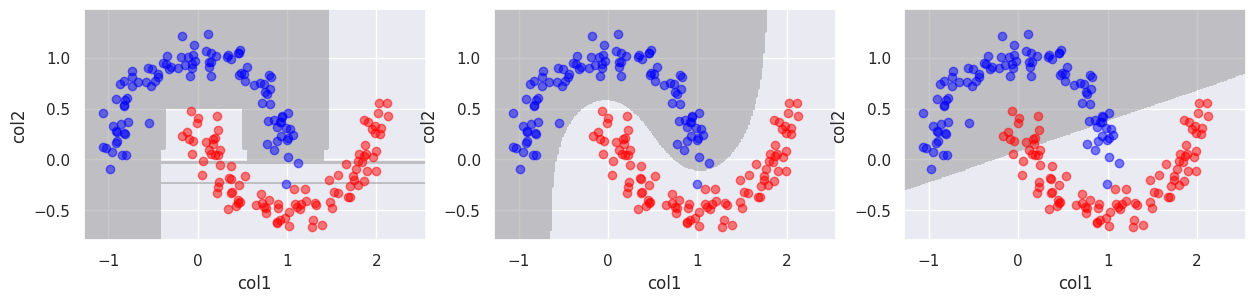

In [ ]:
#@title **code** computing boundaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time

## vamos a definir 3 modelos con sus hiperparámetros
dt = DecisionTreeClassifier(max_depth=25)
sv = SVC(kernel="rbf",  degree=5)
lr = LogisticRegression()

## Introducir los 3 modelos en una lista
estimators = [ dt, sv, lr ]

## descargar dataset de juguete
X,y = make_moons(200, noise=0.1)

plt.figure(figsize=(15,3))
for i, estimator in enumerate(estimators):
    plt.subplot(1,3,i+1)
    t0 = time.time()
    estimator.fit(X,y)
    plot_2Ddata_with_boundary(estimator.predict, X,y)
    t1 = time.time()
    print( ('%.2fs' % (t1 - t0)))
    plt.xlabel("col1"); plt.ylabel("col2")


#**CHALLENGE**

- change the `max_deph` on the decision tree to 1, to 3 or more and observe the decision tree it is generated
- change the kernel, degree and gamma parameter of the SVC.
- see **help** on each estimators to see available paramet

(1372, 5)
0.01s
531.78s
0.02s


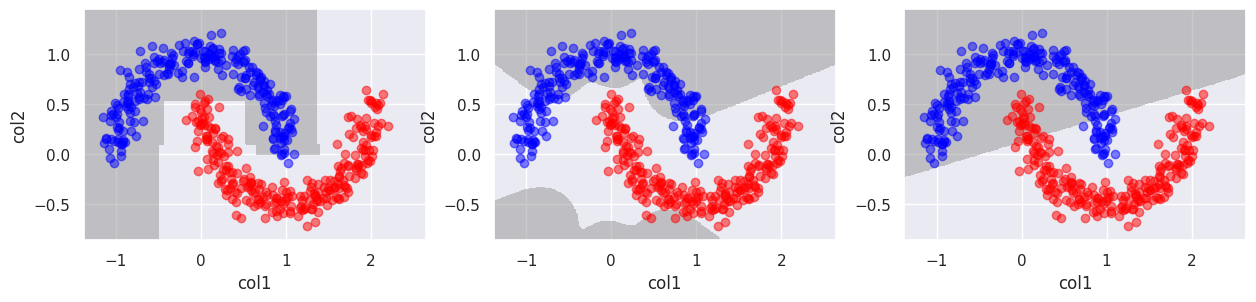

In [ ]:
#@title **code** Train-test split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time
from sklearn import datasets
from sklearn.datasets import *

## Cargar dataset
d = pd.read_csv("data/Copy of data_banknote_authentication.txt.gz")
print(d.shape)

## Separar los datos de las etiquetas
X = d.values[:,:-1]
y = d.values[:,-1]

## separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## cargamos tres modelos de clasificación
dt = DecisionTreeClassifier(max_depth=15)
sv = SVC(kernel="poly",  degree=10, gamma=4)
lr = LogisticRegression()

## los guardamos en una lista (una lista de modelos de machine learning)
estimators = [ dt, sv, lr ]

## Descargo el dataaset make_moons
X,y = make_moons(500, noise=0.1)


plt.figure(figsize=(15,3))
for i, estimator in enumerate(estimators):
    plt.subplot(1,3,i+1)
    t0 = time.time()
    estimator.fit(X,y)
    plot_2Ddata_with_boundary(estimator.predict, X,y)
    t1 = time.time()
    print( ('%.2fs' % (t1 - t0)))
    plt.xlabel("col1"); plt.ylabel("col2")



# 5. **Overfitting and underfitting**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/under-over-fitting.png" width="1000">



Let's supose now we have a noisier dataset.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- what would be the "natural" classification boundary for this dataset?
- what accuracy would you expect to get?

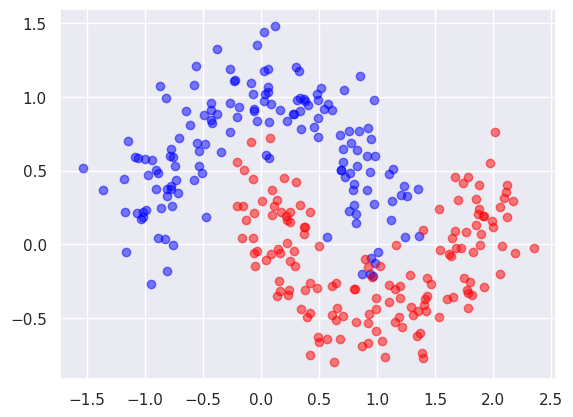

In [ ]:
#@title **code** Noise dataset
X,y = make_moons(300, noise=0.2)
plot_2Ddata_with_boundary(None, X,y)

In [ ]:
#@markdown we now use a 50/50 random split to train and to test
def plot_train_test(estimator, Xtr, Xts, ytr, yts, alpha=.5):
    estimator.fit(Xtr,ytr)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_2Ddata_with_boundary(estimator.predict, Xtr,ytr, alpha=alpha)
    plt.title("TRAIN accuracy %.3f"%estimator.score(Xtr, ytr))
    plt.subplot(122)
    plot_2Ddata_with_boundary(estimator.predict, Xts,yts, alpha=alpha)
    plt.title("TEST accuracy %.3f"%estimator.score(Xts, yts))


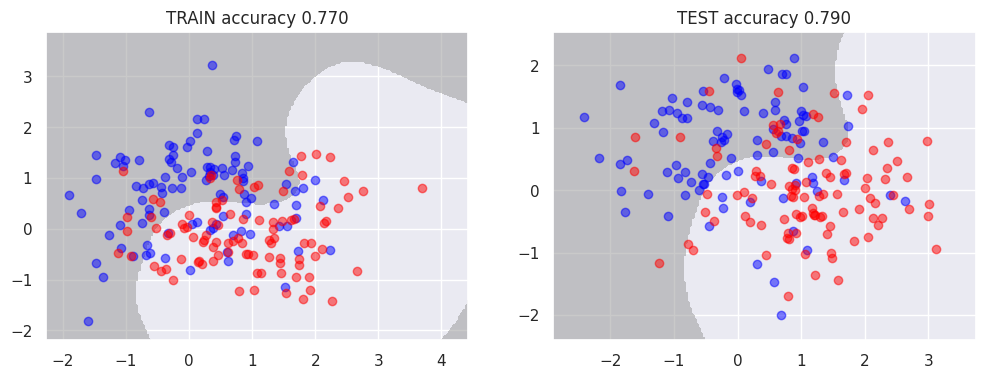

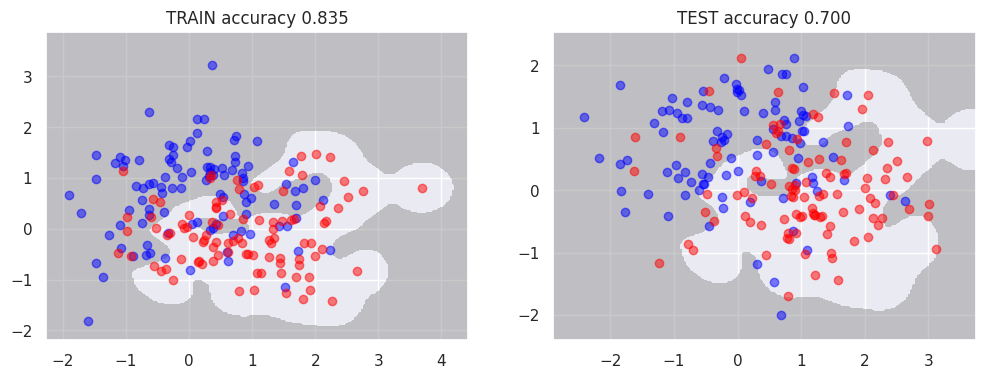

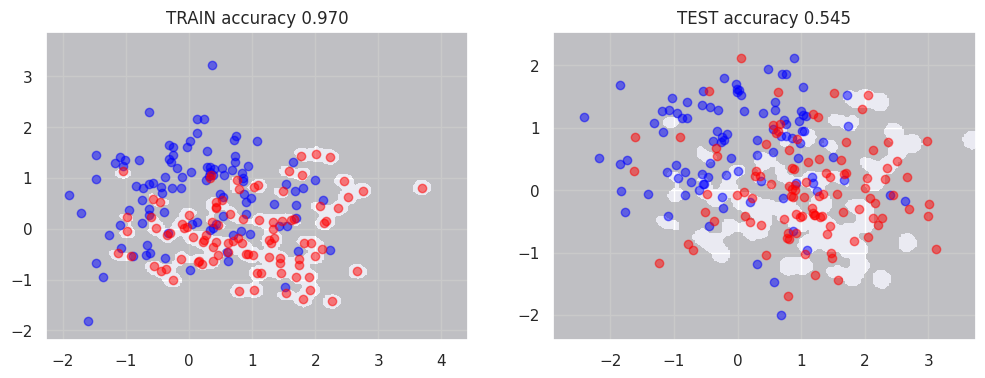

In [ ]:
from sklearn.model_selection import train_test_split
X,y = make_moons(400, noise=0.7)
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

plot_train_test(SVC(kernel="rbf",  gamma=1), Xtr, Xts, ytr, yts)
plot_train_test(SVC(kernel="rbf",  gamma=10), Xtr, Xts, ytr, yts)
plot_train_test(SVC(kernel="rbf",  gamma=100), Xtr, Xts, ytr, yts)


#**CHALLENGE**

Evaluate **overfitting and underfitting** examples over breast cancer dataset and anknote_authentication dataset


# **References**

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity